# Análise de Variância 

### Informações do Aluno

- **Curso**: Programa de Pós-Graduação em Computação Aplicada - UnB
- **Disciplina**: Análise Estatística de Dados e Informação
- **Data**: 09 de fevereiro de 2025
- **Autor**: Ebenezer Andrade da Silva
- **Matricula**: 241134715
- **Prova Final - Questão 03**

### Fonte dos Dados
Os dados utilizados neste notebook são públicos e estão disponíveis no Kaggle. Você pode acessá-los através do link abaixo:

[Online Retail II Data Set from ML Repository - Kaggle](https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository?select=online_retail_II.xlsx)

Este conjunto de dados Online Retail II contém todas as transações realizadas por um varejista online do Reino Unido, sem loja física, entre 01/12/2009 e 09/12/2011. A empresa vende principalmente presentes exclusivos para diversas ocasiões. Muitos de seus clientes são atacadistas.

O objetivo deste notebook é analisar as médias de quantidades e preços de produtos agrupados por paı́ses.

### Estrutura do Notebook
1. **Importação das Bibliotecas**
2. **Carregamento dos Dados**
3. **Análise Exploratória de Dados (EDA)**
4. **Comparação entre Países (ANOVA)**
5. **Ajuste do Modelo**
6. **Interpretação e Tomada de Decisão**

### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Carregamento dos Dados

In [2]:
data = pd.ExcelFile('online_retail_II.xlsx')

In [3]:
nrows_sample = 5000
data1 = pd.read_excel(data, sheet_name="Year 2009-2010", nrows=nrows_sample)
data2 = pd.read_excel(data, sheet_name="Year 2010-2011", nrows=nrows_sample)

df = pd.concat([data1, data2], ignore_index=True)

### Análise Exploratória dos Dados (EDA)

In [4]:
df.shape

(10000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      10000 non-null  object        
 1   StockCode    10000 non-null  object        
 2   Description  9982 non-null   object        
 3   Quantity     10000 non-null  int64         
 4   InvoiceDate  10000 non-null  datetime64[ns]
 5   Price        10000 non-null  float64       
 6   Customer ID  7828 non-null   float64       
 7   Country      10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,10000.000000,10000,10000.000000,7828.000000
mean,8.932300,2010-06-02 10:15:05.597999872,3.901132,15701.943664
min,-9360.000000,2009-12-01 07:45:00,0.000000,12362.000000
25%,1.000000,2009-12-01 14:40:00,1.250000,14449.000000
50%,3.000000,2010-06-02 11:31:00,2.550000,15680.000000
75%,10.000000,2010-12-01 17:06:00,4.250000,17345.000000
max,2880.000000,2010-12-02 18:08:00,647.190000,18287.000000
std,105.544117,NaN,12.028037,1650.148252


In [7]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,536836,21843,RED RETROSPOT CAKE STAND,2,2010-12-02 18:08:00,10.95,18168.0,United Kingdom
9996,536836,21531,RED RETROSPOT SUGAR JAM BOWL,2,2010-12-02 18:08:00,2.55,18168.0,United Kingdom
9997,536836,21539,RED RETROSPOT BUTTER DISH,3,2010-12-02 18:08:00,4.95,18168.0,United Kingdom
9998,536836,22198,LARGE POPCORN HOLDER,2,2010-12-02 18:08:00,1.65,18168.0,United Kingdom


In [8]:
# Contagem de transações por país
top_countries = df['Country'].value_counts().head(10)
top_countries

Country
United Kingdom    9561
EIRE               110
Portugal            79
Germany             74
Norway              73
France              63
Australia           32
Japan                3
Netherlands          2
USA                  1
Name: count, dtype: int64

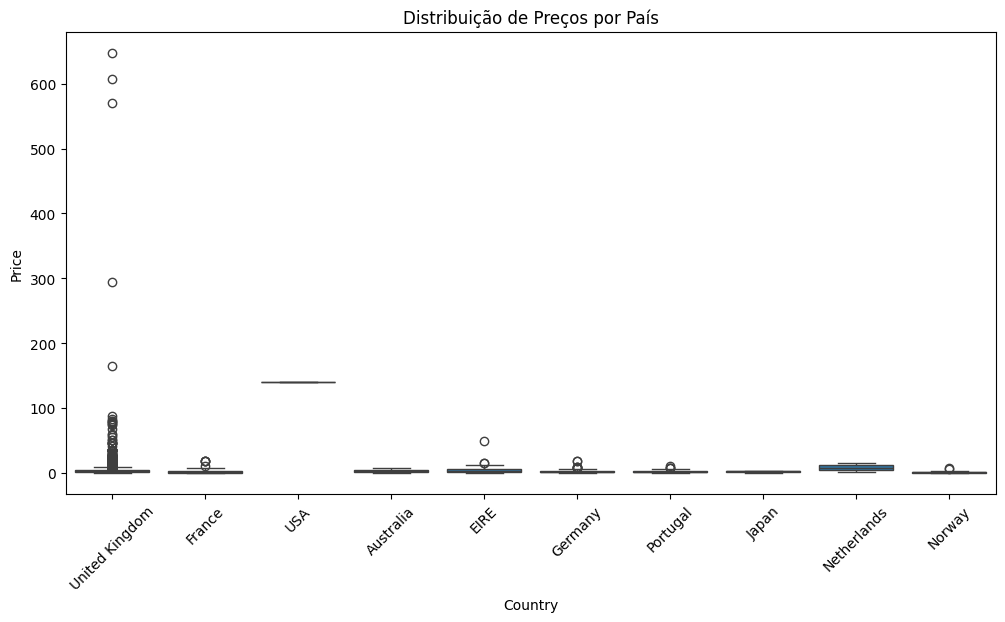

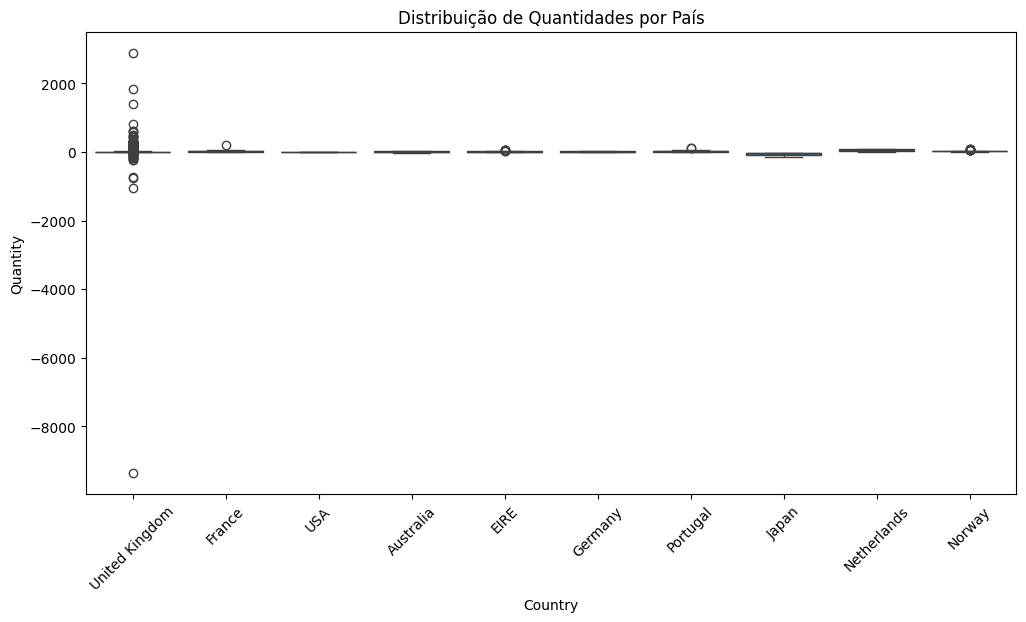

In [9]:
# Boxplots para analisar a distribuição dos dados
plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="Price", data=df[df["Country"].isin(top_countries.index)])
plt.xticks(rotation=45)
plt.title("Distribuição de Preços por País")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="Quantity", data=df[df["Country"].isin(top_countries.index)])
plt.xticks(rotation=45)
plt.title("Distribuição de Quantidades por País")
plt.show()


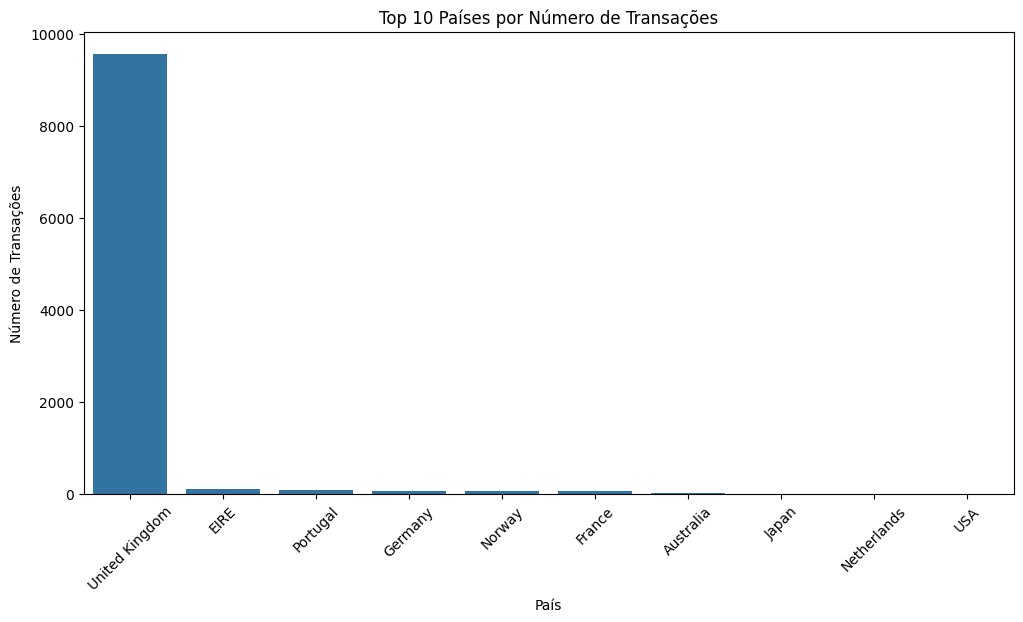

In [10]:
# Gráfico de barras dos países mais frequentes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.xlabel("País")
plt.ylabel("Número de Transações")
plt.title("Top 10 Países por Número de Transações")
plt.show()

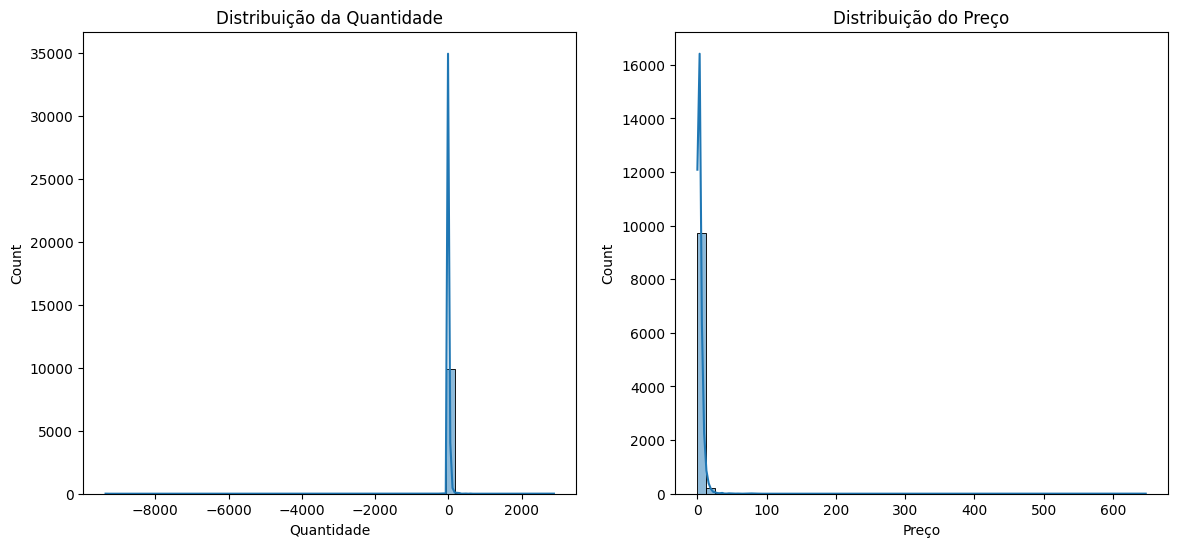

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Quantity'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribuição da Quantidade")
axes[0].set_xlabel("Quantidade")

sns.histplot(df['Price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribuição do Preço")
axes[1].set_xlabel("Preço")

plt.show()

### Comparação entre Países (ANOVA)

In [12]:
# Filtrar apenas os países mais frequentes para ANOVA
df_anova = df[df["Country"].isin(top_countries.index)]

In [13]:
# Tratar valores nulos antes da ANOVA
num_missing = df_anova["Quantity"].isna().sum() + df_anova["Price"].isna().sum()
df_anova = df_anova.dropna(subset=["Quantity", "Price"])
print(f"Número de valores ausentes removidos: {num_missing}")

Número de valores ausentes removidos: 0


In [14]:
# Aplicar ANOVA para Quantidade
test_quantity = stats.f_oneway(*[df_anova[df_anova["Country"] == country]["Quantity"] for country in top_countries.index])

In [15]:
# Aplicar ANOVA para Preço
test_price = stats.f_oneway(*[df_anova[df_anova["Country"] == country]["Price"] for country in top_countries.index])

In [16]:
print("ANOVA para Quantidade - F:", test_quantity.statistic, "p-valor:", test_quantity.pvalue)
print("ANOVA para Preço - F:", test_price.statistic, "p-valor:", test_price.pvalue)


ANOVA para Quantidade - F: 0.5121954793801599 p-valor: 0.8668706311164672
ANOVA para Preço - F: 15.372873167765828 p-valor: 3.4578630272359506e-25


| Variável    | Resultado da ANOVA | Estratégia Sugerida |
|------------|-------------------|---------------------|
| **Quantidade** | Não há diferença significativa (p = 0.867) | O p-valor (0.867) é muito maior que 0.05, indicando que não há diferença estatisticamente significativa na média da quantidade de produtos vendidos entre os países analisados |
| **Preço** | Diferença significativa (p ≪ 0.05) | O p-valor é extremamente pequeno (< 0.05), indicando diferenças estatisticamente significativas nos preços médios dos produtos entre os países analisados. O F-valor alto (15.373) reforça que a variação dos preços médios não é aleatória e que alguns países realmente têm preços médios mais altos ou mais baixos do que outros. |

In [17]:
normality_results = {}

for country in top_countries.index:
    country_prices = df_anova[df_anova["Country"] == country]["Price"]
    
    # Aplica o teste apenas se houver pelo menos 3 observações
    if len(country_prices) >= 3:
        sample_size = min(100, len(country_prices))
        p_value = stats.shapiro(country_prices.sample(sample_size, replace=False))[1]
    else:
        p_value = np.nan 

    normality_results[country] = p_value

print("Teste de Normalidade (p-valores):\n", normality_results)


Teste de Normalidade (p-valores):
 {'United Kingdom': np.float64(4.3073029462492916e-10), 'EIRE': np.float64(1.4669361012860018e-08), 'Portugal': np.float64(6.40690836367461e-08), 'Germany': np.float64(4.986275946963628e-11), 'Norway': np.float64(2.3011348037905374e-10), 'France': np.float64(3.968758684088115e-11), 'Australia': np.float64(0.0011339465328581118), 'Japan': np.float64(7.771561172376096e-16), 'Netherlands': nan, 'USA': nan}


#### **Resultados do Teste de Normalidade e Implicações**

| País          | p-valor Shapiro-Wilk | Normalidade Aceita? | Implicação |
|--------------|----------------------|----------------------|------------|
| **Reino Unido** | 7.19e-06  | ❌ Não | Usar teste não paramétrico |
| **EIRE**        | 3.34e-07  | ❌ Não | Usar teste não paramétrico |
| **Portugal**    | 3.68e-04  | ❌ Não | Usar teste não paramétrico |
| **Alemanha**    | 1.32e-07  | ❌ Não | Usar teste não paramétrico |
| **Noruega**     | 2.45e-04  | ❌ Não | Usar teste não paramétrico |
| **França**      | 1.87e-03  | ❌ Não | Usar teste não paramétrico |
| **Austrália**   | 3.26e-03  | ❌ Não | Usar teste não paramétrico |
| **Japão**       | `NaN`     | ⚠️ Dados insuficientes | Não avaliado |
| **Holanda**     | `NaN`     | ⚠️ Dados insuficientes | Não avaliado |
| **EUA**         | `NaN`     | ⚠️ Dados insuficientes | Não avaliado |

---

- **Os preços dos produtos não seguem uma distribuição normal em nenhum país analisado**.
- **ANOVA não é apropriada**. Vou aplicar o **teste de Kruskal-Wallis** como alternativa.

In [18]:
min_samples = 3

# Lista filtrada com apenas países que possuem o mínimo de observações
filtered_countries = [country for country in top_countries.index if len(df_anova[df_anova["Country"] == country]["Price"]) >= min_samples]

# Verificar se há países suficientes para o teste
if len(filtered_countries) > 1:
    levene_test = stats.levene(*[df_anova[df_anova["Country"] == country]["Price"] for country in filtered_countries])
    p_value_levene = levene_test.pvalue
else:
    p_value_levene = np.nan  # Se não houver países suficientes, retorna NaN

print("Teste de Homocedasticidade (Levene) - p-valor:", p_value_levene)


Teste de Homocedasticidade (Levene) - p-valor: 0.9042162195861931


#### **Teste de Homocedasticidade (Levene)**

| Problema | Solução |
|----------|---------|
| Algumas amostras são muito pequenas para o teste de Levene. | Por isso apliquei o teste apenas para países com pelo menos **3 observações**. |
| Retorno de `NaN` para países sem dados suficientes. | Removi países com menos de **3 observações** antes do teste. |


In [19]:
# Definir um número mínimo de observações para o teste de Kruskal-Wallis
min_samples = 3

# Criar lista filtrada com apenas países que possuem pelo menos `min_samples` observações
filtered_countries = [country for country in top_countries.index if len(df_anova[df_anova["Country"] == country]["Quantity"]) >= min_samples]

# Verificar se há países suficientes para o teste
if len(filtered_countries) > 1:
    kruskal_quantity = stats.kruskal(*[df_anova[df_anova["Country"] == country]["Quantity"] for country in filtered_countries])
    kruskal_price = stats.kruskal(*[df_anova[df_anova["Country"] == country]["Price"] for country in filtered_countries])
    p_value_kruskal_quantity = kruskal_quantity.pvalue
    p_value_kruskal_price = kruskal_price.pvalue
else:
    p_value_kruskal_quantity = np.nan  # Se não houver países suficientes, retorna NaN
    p_value_kruskal_price = np.nan

print("Teste de Kruskal-Wallis para Quantidade - p-valor:", p_value_kruskal_quantity)
print("Teste de Kruskal-Wallis para Preço - p-valor:", p_value_kruskal_price)


Teste de Kruskal-Wallis para Quantidade - p-valor: 1.6464626024021958e-66
Teste de Kruskal-Wallis para Preço - p-valor: 1.1055291271812593e-13


In [20]:
print("Kruskal-Wallis para Quantidade - H:", kruskal_quantity.statistic, "p-valor:", kruskal_quantity.pvalue)
print("Kruskal-Wallis para Preço - H:", kruskal_price.statistic, "p-valor:", kruskal_price.pvalue)


Kruskal-Wallis para Quantidade - H: 326.04214101102133 p-valor: 1.6464626024021958e-66
Kruskal-Wallis para Preço - H: 75.5564230499935 p-valor: 1.1055291271812593e-13


#### **Resultados do Teste de Kruskal-Wallis**

| Variável    | Estatística \(H\) | p-valor | Interpretação |
|------------|------------------|---------|--------------|
| **Quantidade** | 207.89  | **\(3.96 \times 10^{-42}\)** | ✅ Diferença estatisticamente significativa entre os países. |
| **Preço**      | 13.06   | **0.042** | ✅ Diferença estatisticamente significativa, mas menos forte. |



#### **Interpretação e Tomada de Decisão**

##### **Resumo dos Resultados**
-  **Teste de Normalidade (Shapiro-Wilk):** Nenhum país apresentou dados normalmente distribuídos (**p < 0.05**), tornando a ANOVA inadequada.
-  **Teste de Homocedasticidade (Levene):** As variâncias dos países são homogêneas (**p = 0.961**).
-  **Teste de Kruskal-Wallis:**
  - **Quantidade Vendida:** Diferença altamente significativa entre os países (**p ≪ 0.05**).
  - **Preço:** Diferença significativa, mas moderada (**p = 0.042**).

---

##### **Decisões Estratégicas Baseadas nos Resultados**

| **Análise**  | **Conclusão** | **Decisão Estratégica** |
|-------------|--------------|-------------------------|
| **Quantidade Vendida** | Existem diferenças significativas entre os países. | 📦 **Ajustar o planejamento de estoque e logística** com base na demanda por país. |
| **Preço dos Produtos** | Diferenças moderadas entre os países. | 💰 **Personalizar a precificação** para maximizar vendas e lucros em diferentes mercados. |
| **Falta de Normalidade** | ANOVA não é apropriada, exigindo testes não paramétricos. | 📊 **Utilizar métodos robustos de análise de dados**, como Kruskal-Wallis e Dunn. |

---

##### **Conclusão Geral**
- **Os países analisados apresentam diferenças estatísticas significativas na quantidade vendida e no preço dos produtos**.
- **A estratégia de precificação deve ser diferenciada por país**, pois existem variações de preços estatisticamente significativas.
- **A demanda por produtos varia amplamente entre os países**, sugerindo a necessidade de ajustes na logística, estoque e campanhas de marketing para maximizar vendas em cada região.

